In [1]:
import os
import numpy as np
import cv2

In [6]:
# from https://www.toptal.com/opencv/python-image-processing-in-computational-photography
# folder = 'source_folder'

# We get all the image files from the source folder
# files = list([os.path.join(folder, f) for f in os.listdir(folder)])

# We compute the average by adding up the images
# Start from an explicitly set as floating point, in order to force the
# conversion of the 8-bit values from the images, which would otherwise overflow
# average = cv2.imread(files[0]).astype(np.float)
# for file in files[1:]:
#    image = cv2.imread(file)
    # NumPy adds two images element wise, so pixel by pixel / channel by channel
#    average += image
 
# Divide by count (again each pixel/channel is divided)
# average /= len(files)

file = cv2.imread("../02_lights_milky-way-15s/UI8A09838.CR2").astype(np.float)

AttributeError: 'NoneType' object has no attribute 'astype'

In [3]:
# Normalize the image, to spread the pixel intensities across 0..255
# This will brighten the image without losing information

output = cv2.normalize(file, None, 0, 255, cv2.NORM_MINMAX)

In [4]:
# Save the output
cv2.imwrite('output.png', output)

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [5]:
%whos

Variable   Type        Data/Info
--------------------------------
cv2        module      <module 'cv2' from '/opt/<...>ackages/cv2/__init__.py'>
file       NoneType    None
np         module      <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
os         module      <module 'os' from '/opt/a<...>da3/lib/python3.8/os.py'>
output     NoneType    None


In [7]:
os.access('../02_lights_milky-way-15s/UI8A09838.CR2', os.R_OK)

True

In [9]:
# cv2 doesn't handle CR2 raw files... original example doesn't show raw files, either...
# https://stackoverflow.com/questions/2422050/raw-image-processing-in-python

In [10]:
import rawpy

In [50]:
raw = rawpy.imread("../02_lights_milky-way-15s/UI8A09838.CR2") # access to the RAW image

In [51]:
rgb = raw.postprocess(use_camera_wb=True) # a numpy RGB array
image = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR) # the OpenCV image

In [22]:
output = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

In [23]:
cv2.imwrite('output2.png', output)

True

In [26]:
cv2.imwrite('test2.png', image)

True

In [27]:
folder = '../01_darks_15s_930p/'
darks = list([os.path.join(folder, f) for f in os.listdir(folder)])

In [36]:
raw = rawpy.imread(dark)
rgb = raw.postprocess() # a numpy RGB array
average_darks = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR) # the OpenCV image

In [44]:
for dark in darks[3:]:
    raw = rawpy.imread(dark)
    rgb = raw.postprocess() # a numpy RGB array
    image_dark = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR) # the OpenCV image
    # NumPy adds two images element wise, so pixel by pixel / channel by channel
    average_darks += image_dark

TypeError: No loop matching the specified signature and casting was found for ufunc true_divide

In [46]:
average_darks = average_darks/(len(darks)-2)

In [54]:
%whos

Variable            Type        Data/Info
-----------------------------------------
average_darks       ndarray     5496x3670x3: 60510960 elems, type `float64`, 484087680 bytes (461.6619873046875 Mb)
cv2                 module      <module 'cv2' from '/opt/<...>ackages/cv2/__init__.py'>
dark                str         ../01_darks_15s_930p/UI8A9835.CR2
darks               list        n=17
file                NoneType    None
folder              str         ../01_darks_15s_930p/
image               ndarray     5496x3670x3: 60510960 elems, type `uint8`, 60510960 bytes (57.70774841308594 Mb)
image_dark          ndarray     5496x3670x3: 60510960 elems, type `uint8`, 60510960 bytes (57.70774841308594 Mb)
image_minus_darks   ndarray     5496x3670x3: 60510960 elems, type `float64`, 484087680 bytes (461.6619873046875 Mb)
imshow              function    <function imshow at 0x7ff3919700d0>
mpl                 module      <module 'matplotlib' from<...>/matplotlib/__init__.py'>
np                  

In [32]:
darks[1:]

['../01_darks_15s_930p/01_darks_15s_930p_jpg',
 '../01_darks_15s_930p/UI8A9829.CR2',
 '../01_darks_15s_930p/UI8A9828.CR2',
 '../01_darks_15s_930p/UI8A9831.CR2',
 '../01_darks_15s_930p/UI8A9825.CR2',
 '../01_darks_15s_930p/UI8A9824.CR2',
 '../01_darks_15s_930p/UI8A9830.CR2',
 '../01_darks_15s_930p/UI8A9826.CR2',
 '../01_darks_15s_930p/UI8A9832.CR2',
 '../01_darks_15s_930p/UI8A9833.CR2',
 '../01_darks_15s_930p/UI8A9827.CR2',
 '../01_darks_15s_930p/UI8A9823.CR2',
 '../01_darks_15s_930p/UI8A9837.CR2',
 '../01_darks_15s_930p/UI8A9836.CR2',
 '../01_darks_15s_930p/UI8A9834.CR2',
 '../01_darks_15s_930p/UI8A9835.CR2']

In [43]:
len(darks)-2

15

In [41]:
darks

['../01_darks_15s_930p/.DS_Store',
 '../01_darks_15s_930p/01_darks_15s_930p_jpg',
 '../01_darks_15s_930p/UI8A9829.CR2',
 '../01_darks_15s_930p/UI8A9828.CR2',
 '../01_darks_15s_930p/UI8A9831.CR2',
 '../01_darks_15s_930p/UI8A9825.CR2',
 '../01_darks_15s_930p/UI8A9824.CR2',
 '../01_darks_15s_930p/UI8A9830.CR2',
 '../01_darks_15s_930p/UI8A9826.CR2',
 '../01_darks_15s_930p/UI8A9832.CR2',
 '../01_darks_15s_930p/UI8A9833.CR2',
 '../01_darks_15s_930p/UI8A9827.CR2',
 '../01_darks_15s_930p/UI8A9823.CR2',
 '../01_darks_15s_930p/UI8A9837.CR2',
 '../01_darks_15s_930p/UI8A9836.CR2',
 '../01_darks_15s_930p/UI8A9834.CR2',
 '../01_darks_15s_930p/UI8A9835.CR2']

In [47]:
image_minus_darks = image - average_darks

output = cv2.normalize(image_minus_darks, None, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite('output_image_minus_darks.png', output)

True

In [48]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 5, 10
from matplotlib.pyplot import imshow

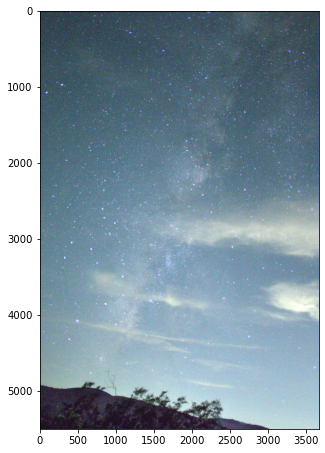

In [52]:
imshow(rgb)

In [53]:
# https://pypi.org/project/rawpy/
# image is super washed out - how to fix...

In [60]:
updated_image = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR) # the OpenCV image
image_minus_darks = updated_image - average_darks
normalized = cv2.normalize(image_minus_darks, None, 0, 255, cv2.NORM_MINMAX)

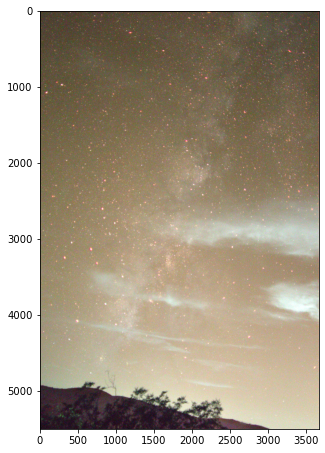

In [63]:
imshow(updated_image)